In [85]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sxmreader import SXMReader
import pySPM as spm
import os
from skimage.filters import difference_of_gaussians as dog
from scipy import fftpack
%matplotlib inline

/home/a/as/asai/.conda/envs/tight/lib/python3.8/site-packages/pySPM/utils/misc.py:135: UserWarning: the library tqdm cannot be found. All progressbar will be disabled.
  warn("the library tqdm cannot be found. All progressbar will be disabled.")


In [216]:
filerange = range(533,540)
#filerange = [528, 551, 536, 543, 513]
data = SXMReader(['electromigration_22/Image_{}.sxm'.format(n) for n in filerange], channel='Bias')

# Show the results

def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

AttributeError: 'numpy.ndarray' object has no attribute 'ifft'

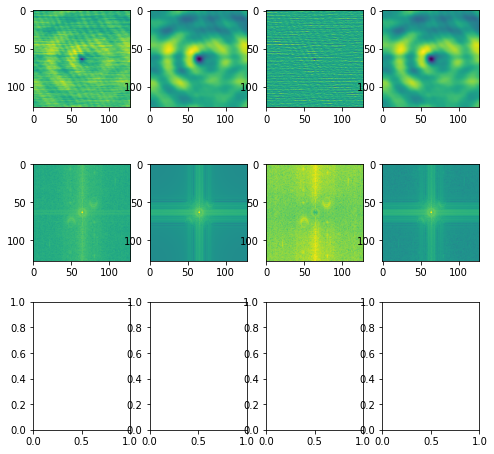

In [4]:
from matplotlib.colors import LogNorm
from scipy.ndimage import gaussian_filter, laplace
f = np.fft.fft2(data[0])
fshift = np.fft.fftshift(f)

filtered = gaussian_filter(data[0], sigma=2.7)
filt_f = np.fft.fft2(filtered)
filt_fshift = np.fft.fftshift(filt_f)
high_freq = data[0] - gaussian_filter(data[0], sigma=0.3)
high_freq_f = np.fft.fft2(high_freq)
high_fshift = np.fft.fftshift(high_freq_f)
composite = high_freq + filtered
composite_f = np.fft.fft2(composite)
composite_fshift = np.fft.fftshift(composite_f)
f, axs = plt.subplots(3, 4)
f.set_figheight(8)
f.set_figwidth(8)
axs[0, 0].imshow(data[0])
axs[0, 1].imshow(filtered)
axs[0, 2].imshow(high_freq)
axs[0, 3].imshow(composite)
axs[1, 0].imshow(np.abs(fshift), norm=LogNorm(vmin=1e-12))
axs[1, 1].imshow(np.abs(filt_fshift), norm=LogNorm(vmin=1e-12))
axs[1, 2].imshow(np.abs(high_fshift), norm=LogNorm(vmin=1e-12))
axs[1, 3].imshow(np.abs(composite_fshift), norm=LogNorm(vmin=1e-12))
axs[2, 0].imshow()

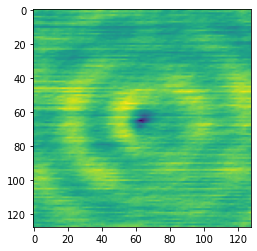

In [74]:
plt.imshow(np.abs(np.fft.ifft2(fshift*mask)))

In [96]:
np.array(data[0])[64,:]

array([0.01336738, 0.01336701, 0.01339392, 0.01341013, 0.01341933,
       0.01341033, 0.01341298, 0.01339151, 0.0133667 , 0.01338206,
       0.01339622, 0.01340448, 0.01341913, 0.0134259 , 0.01342707,
       0.01343851, 0.0134605 , 0.01347553, 0.01350443, 0.01352004,
       0.01351439, 0.01351718, 0.01351005, 0.01351967, 0.01353733,
       0.01353964, 0.01352008, 0.01352893, 0.01351546, 0.01351553,
       0.01351887, 0.01350187, 0.0134728 , 0.01344422, 0.01342785,
       0.01341909, 0.01342018, 0.01343359, 0.01343891, 0.0134513 ,
       0.01344421, 0.01345383, 0.01346874, 0.01348441, 0.01352947,
       0.01355022, 0.0135367 , 0.01351884, 0.01351859, 0.01353687,
       0.01356277, 0.01359401, 0.01360343, 0.01359912, 0.01357156,
       0.01352026, 0.01349992, 0.013481  , 0.01346828, 0.01340249,
       0.0132903 , 0.01314792, 0.01303326, 0.01297127, 0.01299526,
       0.0130714 , 0.01314348, 0.01319249, 0.0132361 , 0.01328851,
       0.01332662, 0.01336271, 0.0133715 , 0.01338989, 0.01339

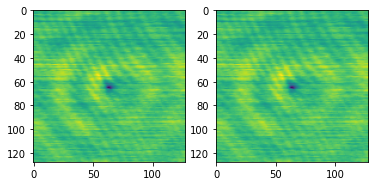

In [149]:
ff = np.fft.fft2(data[0])
fshift = np.fft.fftshift(ff)

f, axs = plt.subplots(1, 2)
axs[0].imshow(data[0])
axs[1].imshow(np.real(np.fft.ifft2(ff)))

In [277]:
import matplotlib as mpl

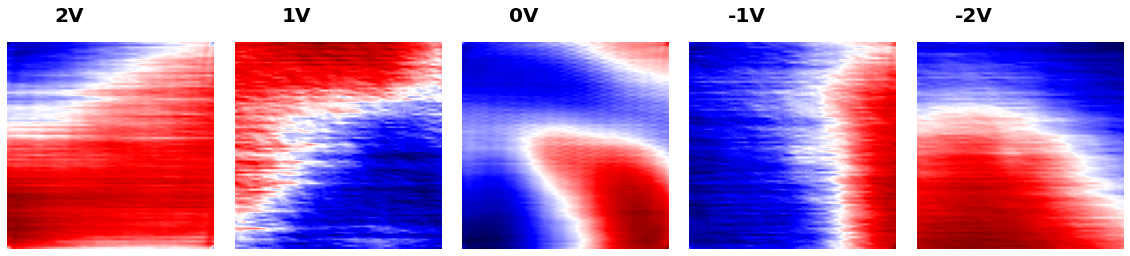

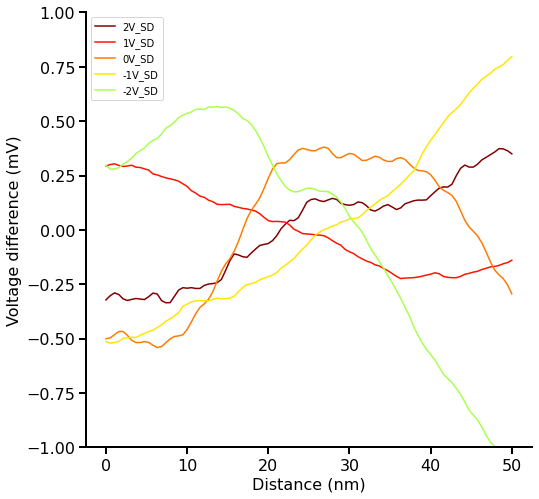

In [470]:
vg = 0
voltages = [3,2,1,0,-1,-2,-3]
#filerange = [528, 527, 526, 525, 530, 531, 532] #-60Vg
#filerange = [551, 550, 549, 548, 552, 553, 554] #-50Vg
#filerange = [536, 535, 534, 533, 537, 538, 539] #-40Vg
#filerange = [543, 542, 541, 540, 544, 545, 547] #-30Vg
#filerange = [513, 514, 515, 519, 516, 517, 518] #-20Vg
#filerange = [582, 580, 579, 578, 583, 584, 585] #-10Vg
#filerange = [592, 590, 587, 586, 593, 594, 595] #0Vg
#filerange = [603, 602, 598, 597, 599, 600, 601] #10Vg
#filerange = [525, 548, 533, 540, 519, 578, 586, 597]

voltages = [2,1,0,-1,-2]
#filerange = [965, 962, 953, 963, 964] #-60Vg
#filerange = [966, 967, 952, 968, 969] #-50Vg
#filerange = [973, 972, 951, 971, 970] #-40Vg
#filerange = [974, 975, 950, 976, 977] #-30Vg
#filerange = [981, 980, 949, 979, 978] #-20Vg
#filerange = [982, 983, 954, 984, 985] #-10Vg
filerange = [989, 988, 955, 987, 986] #0Vg

folder_name = 'electromigration_22'
SET_NAME = "{}-{}_STP".format(min(filerange), max(filerange))
data = SXMReader([folder_name + '/Image_{}.sxm'.format(n) for n in filerange], channel='Bias')

ANALYSIS_FOLDER = "./analysis/dipole/"
if not os.path.exists(ANALYSIS_FOLDER):
    os.makedirs(ANALYSIS_FOLDER)

delta_V = []
intensity_data = []
rad_data = []
linecut = []
mpl.rc('figure',  figsize=(20, 20))
f, axs = plt.subplots(1,len(filerange))
plt.subplots_adjust(wspace=0.1, hspace=0.05)

for i, filename in enumerate(filerange):
    x,y = np.meshgrid(range(len(data[i])), range(len(data[i])))
    m = len(data[i])/2
    x00, y00 = 16, 16 
    x0, y0 =  m+x00, m-y00
    x1, y1 = m-x00, m+y00
    r = 15
    mask = ((x-x0)**2 + (y-y0)**2 > r**2) * ((x-x1)**2 + (y-y1)**2 > r**2)
    
    ff = np.fft.fft2(data[i])
    fshift = np.fft.fftshift(ff)
    iffft = np.fft.ifft2(np.fft.ifftshift(fshift*mask)).real
    iffft = -iffft
    axs[i].imshow(iffft, origin = 'lower', cmap = 'seismic')
    axs[i].text(35,105, "{}V".format(voltages[i]), ha="right", weight='bold', color="black", fontsize =20)
    axs[i].axis('off')
    
    
    # Image center
    cen_x = np.average(x)
    cen_y = np.average(y)
    # Get image parameters
    a = np.abs(fshift).shape[0]
    b = np.abs(fshift).shape[1]
    # Find radial distances
    [X, Y] = np.meshgrid(np.arange(b) - cen_x, np.arange(a) - cen_y)
    R = np.sqrt(np.square(X) + np.square(Y))
    bin_size = 0.5
    rad = np.arange(1, np.max(R), bin_size)
    intensity = np.zeros(len(rad))
    index = 0
    for i in rad:
        mask2 = (np.greater(R, i - bin_size) & np.less(R, i + bin_size) )
        values = np.abs(fshift)[mask2]
        intensity[index] = np.mean(values)
        index += 1
    intensity_data.append(intensity)
    rad_data.append(rad)
    minn = int(m)-10
    maxx = int(m)+10
    linecut.append(np.average(iffft[minn:maxx,:],0) - np.average(iffft[minn:maxx,:]))
f.savefig(ANALYSIS_FOLDER + "STP_"+ str(vg) + "Vg_" + SET_NAME + ".png", bbox_inches='tight')

    
    #axs[0, 0].imshow(data[i])
    #axs[0, 1].imshow(iffft)
    #axs[0, 2].plot(range(len(data[i])), np.array(data[i])[64,:])
    #axs[1, 0].imshow(np.abs(fshift), norm=LogNorm(vmin=1e-12))
    #axs[1, 1].imshow(np.abs(fshift*mask), norm=LogNorm(vmin=1e-12))
    #axs[1, 2].plot(range(len(data[i])), np.average(iffft[54:74,:],0))
    #temp = np.max(np.average(iffft[54:74,:],0)) - np.min(np.average(iffft[54:74,:],0))
    #delta_V.append(temp)
colors = plt.cm.jet(np.linspace(1,0,10)) 
f = plt.figure(figsize = (8,8))
for i, file in enumerate(filerange):
    plt.plot(np.linspace(0,50,len(data[i])),linecut[i]*1000, color = colors[i], label = '{}V_SD'.format(voltages[i]))
plt.legend(fontsize = 10)
plt.ylabel('Voltage difference (mV)')
plt.xlabel('Distance (nm)')
plt.ylim([-1,1])
f.savefig(ANALYSIS_FOLDER + "STP_linecut_"+ str(vg) + "Vg_" + SET_NAME + ".png", bbox_inches='tight')

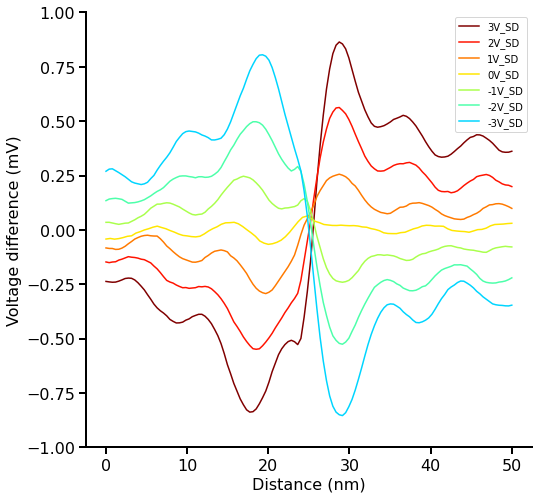

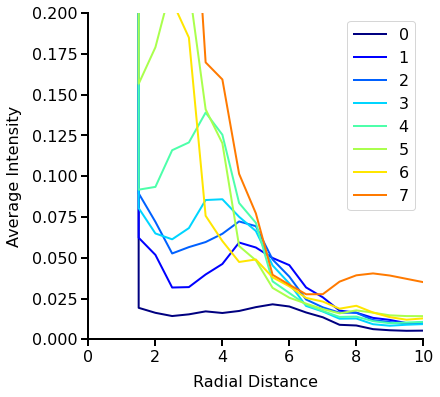

In [375]:
colors = plt.cm.jet(np.linspace(0,1,10)) 
# Adjust plot parameters
mpl.rcParams['font.family'] = 'DejaVu Sans'
mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['xtick.major.size'] = 7
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 7
mpl.rcParams['ytick.major.width'] = 2
# Create figure and add subplot
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111)
# Plot data
for i, filename in enumerate(filerange):
    ax.plot(rad_data[i], intensity_data[i], linewidth=2, color = colors[i], label = str(i))

# Edit axis labels
ax.set_xlabel('Radial Distance', labelpad=10)
ax.set_ylabel('Average Intensity', labelpad=10)
ax.set_ylim([0,0.2])
ax.set_xlim([0,10])
ax.legend()

In [392]:
import csv 
  
# data rows of csv file  
rows = intensity_data + rad_data

with open(ANALYSIS_FOLDER + 'radial_data', 'w') as f: 
      
    # using csv.writer method from CSV package 
    write = csv.writer(f) 
       
    write.writerows(rows) 

In [218]:
voltages = [0,1,2,3,-1,-2,-3]
#voltages = [-60,-50,-40,-30,-20]
zipped = zip(voltages,np.sign(voltages)*delta_V)
delta_V_data = sorted(zipped, key = lambda x: x[0])
delta_V_data = [[ i for i, j in delta_V_data ], [ j for i, j in delta_V_data ]] 

In [214]:
delta_V_data

[[-60, -50, -40, -30, -20],
 [-0.0017023266477578236,
  -0.0017513052767286208,
  -0.0018402642902084487,
  -0.0019421914033710408,
  -0.002076800827886638]]

Text(0.5, 0, 'V_SD (V)')

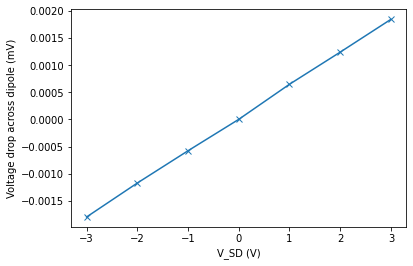

In [219]:
plt.plot(delta_V_data[0], delta_V_data[1],'-x')
plt.ylabel('Voltage drop across dipole (mV)')
plt.xlabel('V_SD (V)')

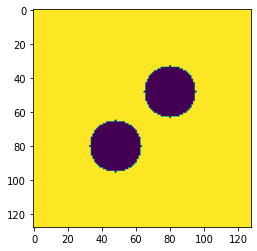

In [72]:
plt.imshow(mask)

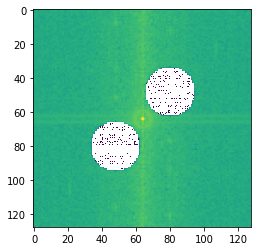

In [73]:
plt.imshow(np.abs(fshift*mask), norm=LogNorm(vmin=1e-12))

In [261]:
a = 1
p = 1
kf=10

px = len(data[0])
x,y = np.meshgrid(np.linspace(-a, a, px), np.linspace(-a, a, px))
r = np.sqrt(x**2+y**2)
cos = x/r

avg = np.average(Phi)
phi = np.linspace(0,np.pi,10)

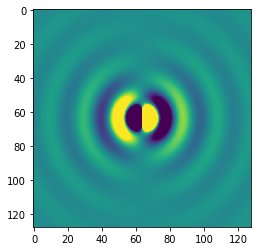

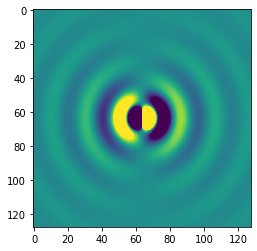

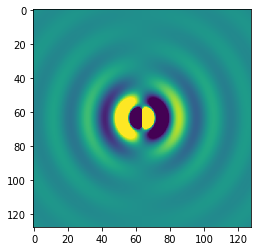

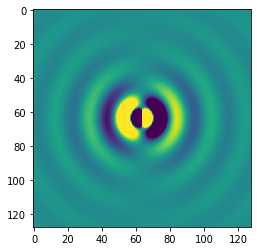

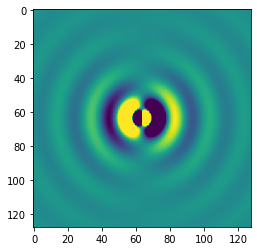

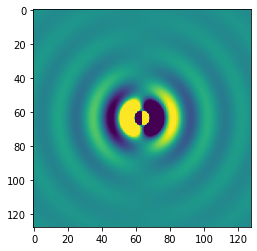

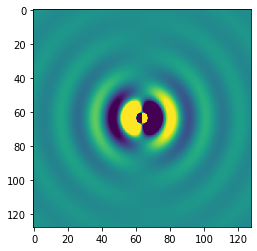

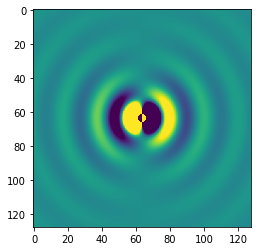

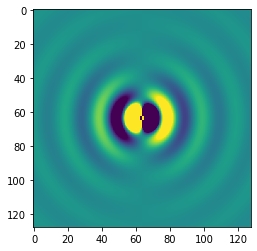

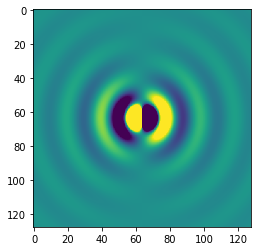

In [264]:
crange = 10
for i in range(10):
    plt.figure()
    Phi = p*cos/r**2*np.sin(2*kf*r + phi[i])
    plt.imshow(Phi, clim=[avg-crange,avg+crange])